In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'png'
mpl.rcParams['figure.dpi']= 300

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 60)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import sklearn
from sklearn.preprocessing import StandardScaler, Binarizer, LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate \
                                    ,cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import roc_curve, auc

import itertools
from sklearn.metrics import confusion_matrix

import joblib

# Helper Functions

In [2]:
target_names=['No','Yes']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def confusion_matrices(y_pred):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix, without normalization')
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                          title='Confusion matrix, Normalized')

In [3]:
def plot_roc_curve(fit_model, title):
    y_score=fit_model.predict_proba(X_test)[:,1]
    fpr, tpr,_ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,6))
    # Plotting the Baseline
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.grid(which='major')
    plt.title(f"{title} ROC curve")
    s= 'AUC: ' + str(round(metrics.roc_auc_score(y_test, fit_model.predict(X_test)),3))
    plt.text(0.75, 0.25, s=s, ha='right', va='bottom', fontsize=14,
             bbox=dict(facecolor='grey', alpha=0.5))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate');

# Load Data

In [15]:
from sklearn.externals import joblib
savedir = 'models'
cat_clf = joblib.load(f'{savedir}/catboost_month_incident_12.06.2018.joblib')
import joblib
savedir = 'data/clean'
df = joblib.load(f'{savedir}/df_for_plots')

In [12]:
example = {
  'airport_code': 'SEA',  # str
  'airline': 'Delta Air Lines',    # str
  'claim_type': 'PropertyLoss',    # str
  'claim_site': 'Checkpoint',  # str
  'item_category': 'Clothing',  # str
  'days_waited_to_file_claim': 7,  # int
  'Month_inc_date': '1'  # int (1-12)
}


def make_prediction(features):
    '''
    :param features: dictionary like 'example' above
    :return: 2 pair dict of binary outcome (compensate and not compensate) and the probablity
    '''
    X = pd.DataFrame(data=features, index=[0])

    categorical = ['airport_code', 'airline', 'claim_type', 'claim_site', 'Month_inc_date']
    continuous = ['days_waited_to_file_claim']

    trans_dir = './web_app/stat_models/transformers'
    enc = joblib.load(f'{trans_dir}/onehotencode.joblib')
    onehotarray = enc.transform(X[categorical])

    ss = joblib.load(f'{trans_dir}/standardscaler.joblib')
    continuousarray = ss.transform(X[continuous])

    mlb = joblib.load(f'{trans_dir}/item_category.joblib')
    onehot_itemcategories = mlb.transform(X['item_category'].str.replace(' ', '').str.split(pat=';'))

    X = np.concatenate((onehotarray, continuousarray, onehot_itemcategories), axis=1)

    prob_receive_compensation = cat_clf.predict_proba(X)[0, 1]

    result = {
        'compensation': int(prob_receive_compensation > 0.5),
        'prob_receive_compensation': prob_receive_compensation
    }
    return prob_receive_compensation

/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/home/spencer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with

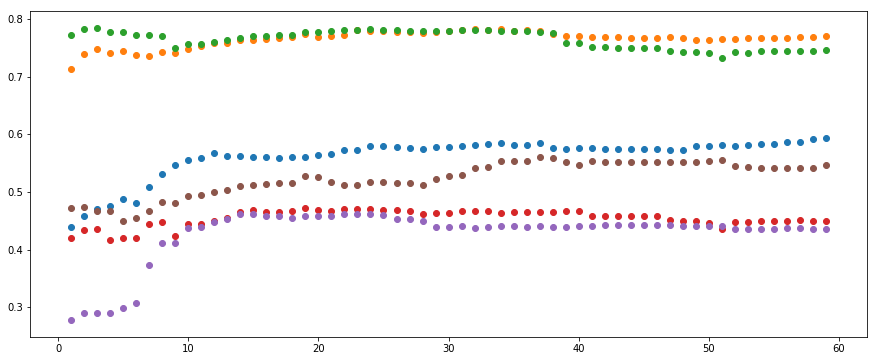

In [13]:
example = {
  'airport_code': 'SEA',  # str
  'airline': 'Delta Air Lines',    # str
  'claim_type': 'PropertyLoss',    # str
  'claim_site': 'Checkpoint',  # str
  'item_category': 'Clothing',  # str
  'days_waited_to_file_claim': 7,  # int
  'Month_inc_date': '1'  # int (1-12)
}

period = range(1,60)

el1 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el1.append(make_prediction(example))

example = {
  'airport_code': 'JFK',  # str
  'airline': 'Southwest Airlines',    # str
  'claim_type': 'PropertyDamage',    # str
  'claim_site': 'Checkpoint',  # str
  'item_category': 'Clothing',  # str
  'days_waited_to_file_claim': 7,  # int
  'Month_inc_date': '10'  # int (1-12)
}
el2 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el2.append(make_prediction(example))

example = {
  'airport_code': 'ORD',  # str
  'airline': 'UAL',    # str
  'claim_type': 'PropertyDamage',    # str
  'claim_site': 'Checkpoint',  # str
  'item_category': 'Jewelry',  # str
  'days_waited_to_file_claim': 7,  # int
  'Month_inc_date': '11'  # int (1-12)
}
el3 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el3.append(make_prediction(example))

example = {
  'airport_code': 'ORD',  # str
  'airline': 'UAL',    # str
  'claim_type': 'PropertyDamage',    # str
  'claim_site': 'Checked Baggage',  # str
  'item_category': 'Jewelry',  # str
  'days_waited_to_file_claim': 7,  # int
  'Month_inc_date': '11'  # int (1-12)
}
el4 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el4.append(make_prediction(example))

example = {
  'airport_code': 'LAX',  # str
  'airline': 'American Airlines',    # str
  'claim_type': 'PropertyLoss',    # str
  'claim_site': 'Checked Baggage',  # str
  'item_category': 'Computer',  # str
  'days_waited_to_file_claim': 30,  # int
  'Month_inc_date': '6'  # int (1-12)
}
el5 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el5.append(make_prediction(example))

example = {
  'airport_code': 'PDX',  # str
  'airline': 'Alaska Airlines',    # str
  'claim_type': 'PropertyLoss',    # str
  'claim_site': 'Checkpoint',  # str
  'item_category': 'Purse',  # str
  'days_waited_to_file_claim': 5000,  # int
  'Month_inc_date': '3'  # int (1-12)
}
el6 = []
for i in period:
    example['days_waited_to_file_claim'] = i
    el6.append(make_prediction(example))

fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(x=period, y=el1)
ax.scatter(x=period, y=el2)
ax.scatter(x=period, y=el3)
ax.scatter(x=period, y=el4)
ax.scatter(x=period, y=el5)
ax.scatter(x=period, y=el6)

<Figure size 432x288 with 0 Axes>

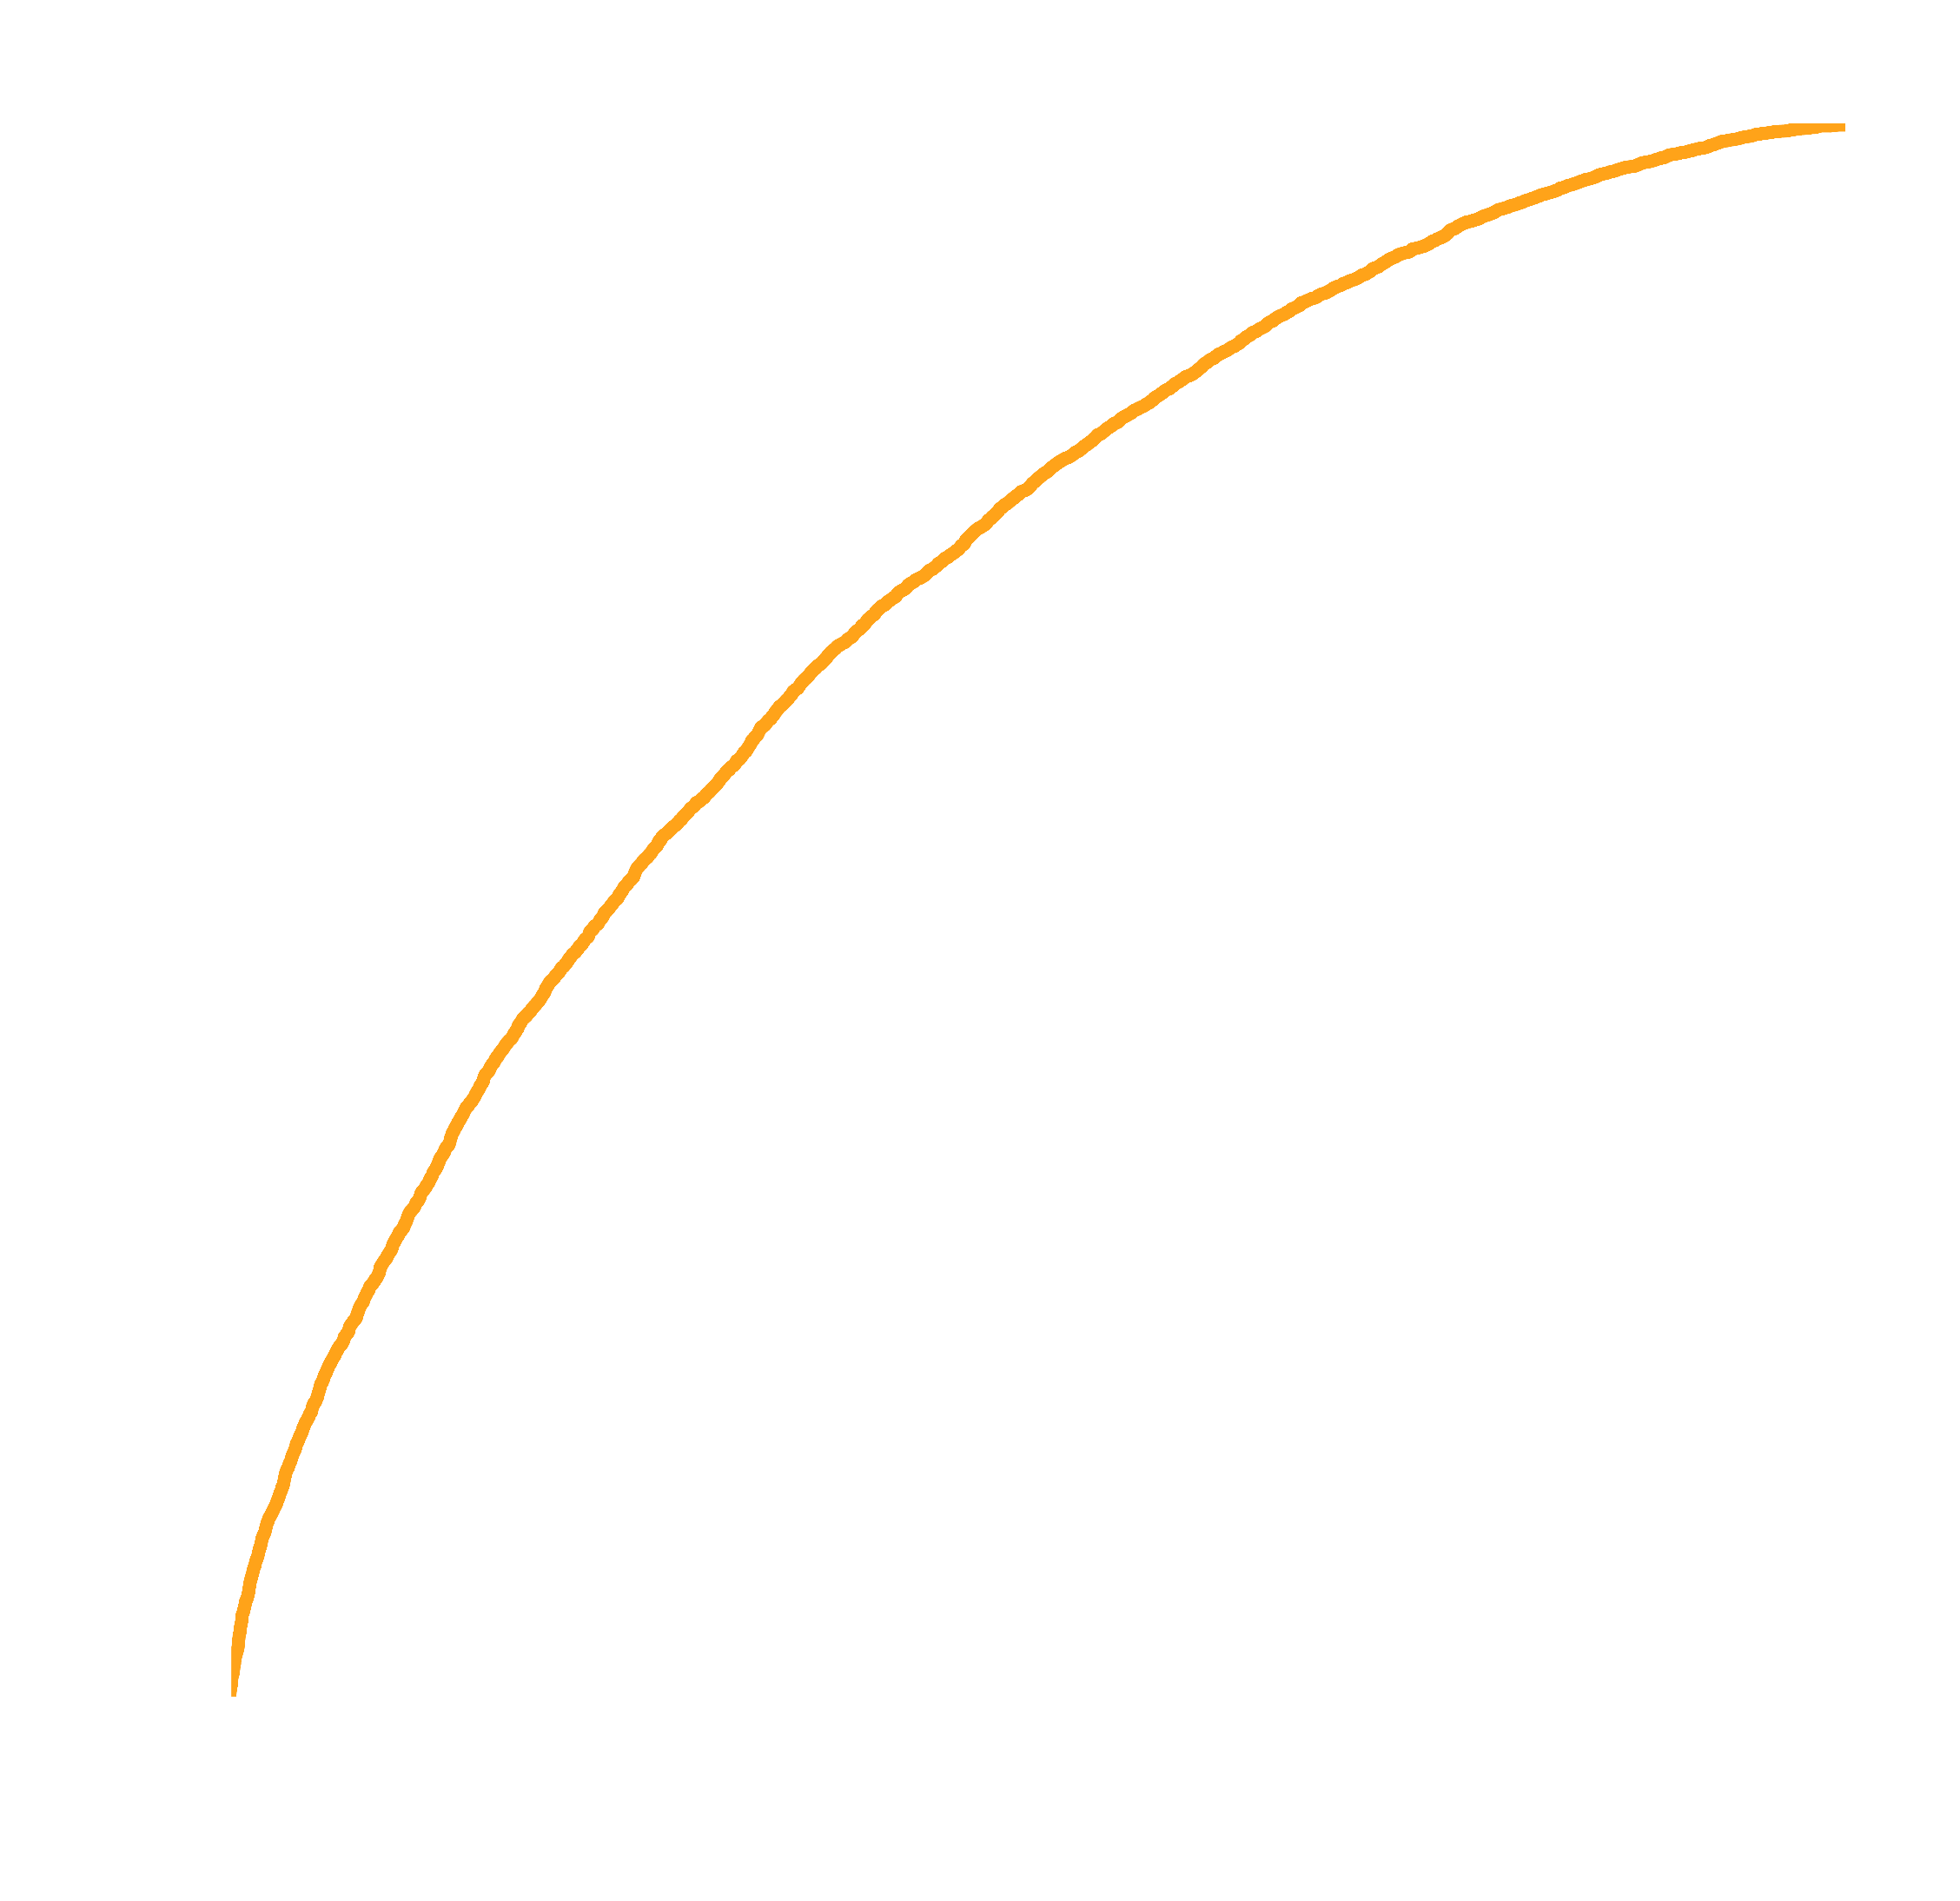

In [142]:
def plot_roc_curve_single(main_model):
    y_score_main = main_model.predict_proba(X_test)[:,1]
#     y_score_second = secondary_model.predict_proba(X_test2)[:,1]
    
    
    hfont = {'fontname':'Carlito',
             'size': 22}
    
    tickfont = {'fontname':'Carlito',
             'size': 16}
    
    titlefont = {'fontname':'Carlito',
             'size': 30}
    
    fpr1, tpr1, _ = roc_curve(y_test, y_score_main)
#     fpr2, tpr2, _ = roc_curve(y_test2, y_score_second)
    plt.clf()
    plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white'})
    plt.figure(figsize = (8,8), dpi=300)
    plt.xlim(xmin=0, xmax=1)
    plt.ylim(ymin=0, ymax=1.001)
#     plt.f
#     plt.figlegend(
    plt.figtext(.55, .35,'AUC  =  .627',bbox=dict(
#         facecolor='#ff9900ff', 
        # edgecolor='#ff9900ff',
        facecolor='none',
        edgecolor='none',
        alpha=1), color='white', **titlefont)
#     plt.figtext(.55, .30,"GB  AUC  =  .806",bbox=dict(facecolor='#2274a5', alpha=0.5), **titlefont)

    #Plot the baseline
    plt.plot([0,1],[0,1], c='white', ls='--')
    plt.plot(fpr1, tpr1, c='#ff9900ff', linewidth=3.5, alpha = 0.9)
#     plt.plot(fpr2, tpr2, c='#2274a5', linewidth=2)
    plt.title('ROC Curve', color='white', fontweight='bold', **titlefont)
    plt.xlabel('False Positive Rate', color='white', horizontalalignment='left', x=0, **hfont)
    plt.ylabel('True Positive Rate', color='white', verticalalignment='top', y=1.062, rotation=0, labelpad = -81, **hfont)
    plt.xticks(list(np.linspace(.1,1,10)), color='white', **tickfont)
    plt.yticks(list(np.linspace(.1,1,10)), color='white', **tickfont)
#     plt.grid(b=True, color='white', which='major', axis='both', alpha=0.2)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()], color='white', **hfont)
    plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()], color='white', **hfont)
    sns.despine(ax=plt.gca())
    return plt

fig = plot_roc_curve_single(cat_clf)

savedir = 'images'
fig.savefig(f'./{savedir}/presentation_AUC_plot.png', format='png', dpi=300, bbox_inches='tight', Frameon=True, transparent=True)

In [21]:
saveplots = 'images/plots'

In [22]:
import seaborn as sns

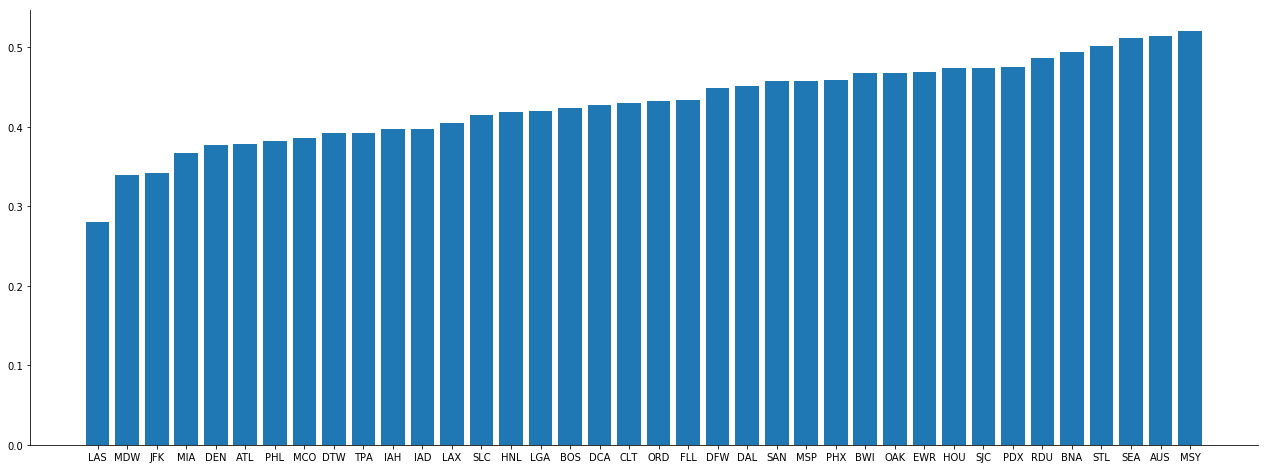

In [46]:
ser = df.groupby(['airport_code']).bin_dispos_onehot.mean().sort_values()
fig, ax = plt.subplots(figsize=(22, 8))
ax.bar(x=ser.index, height=ser.values)
sns.despine(ax=plt.gca())
fig.savefig(f'{saveplots}/airport_probability.png', Transparent=False)

In [51]:
ser2.index

Index(['British Airways', 'Jet Blue', 'Frontier Airlines', 'AirTran Airlines',
       'Delta Air Lines', 'USAir', 'Spirit Airlines', 'Continental Airlines',
       'American Airlines', 'Southwest Airlines', 'UAL', 'Northwest Airlines',
       'Alaska Airlines', '-'],
      dtype='object', name='airline')

In [55]:
airlines_plot_list = ['British Airways', 'Jet Blue', 'Frontier', 'AirTran', 'Delta', 'USAir', 'Spirit', 'Continental', 'American', 'Southwest', 'UAL', 'Northwest', 'Alaska', '-']

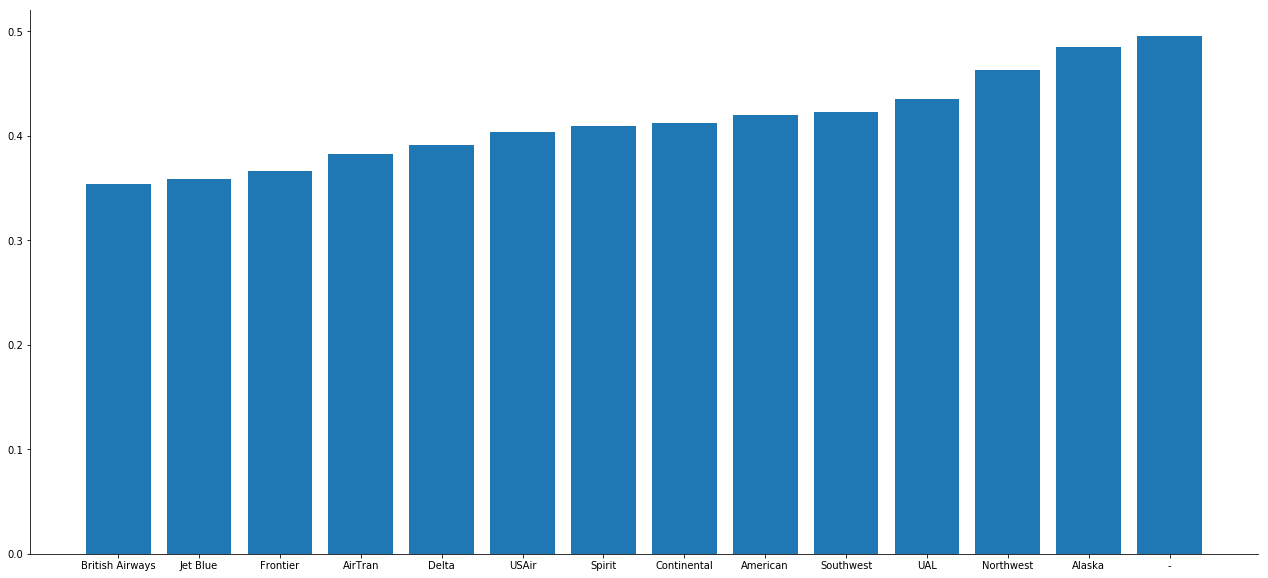

In [56]:
ser2 = df.groupby(['airline']).bin_dispos_onehot.mean().sort_values()
fig, ax = plt.subplots(figsize=(22,10))
ax.bar(x=airlines_plot_list, height=ser2.values)
sns.despine(ax=plt.gca())
fig.savefig(f'{saveplots}/airline_probability.png', Transparent=False);

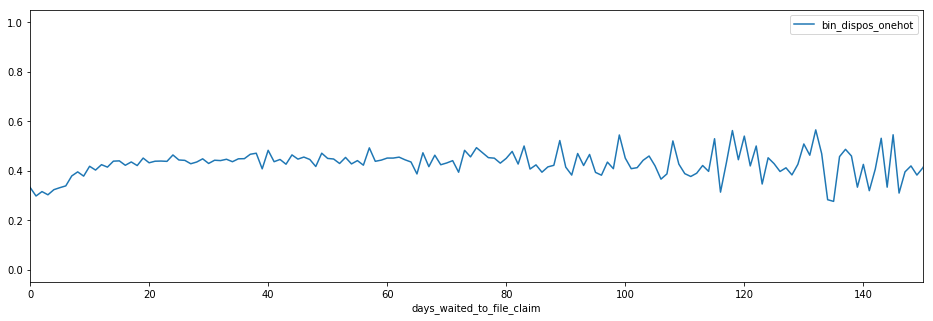

In [252]:
df.groupby('days_waited_to_file_claim').mean().plot(y='bin_dispos_onehot', xlim=(0,150),figsize=(16,5))
sns.despine()
fig.savefig(f'{saveplots}/airport_probability.png', Transparent=False);

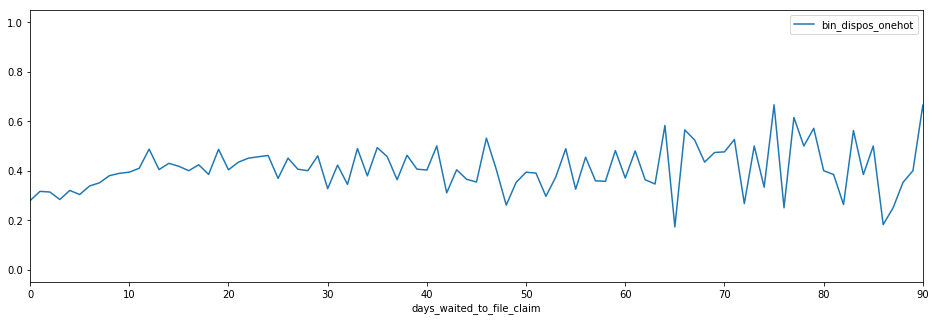

In [241]:
df[df.Month_inc_date == '7'].groupby('days_waited_to_file_claim').mean().plot(y='bin_dispos_onehot', xlim=(0,90),figsize=(16,5));

In [227]:
df.groupby(['Month_inc_date']).bin_dispos_onehot.mean().sort_values(ascending=False)

Month_inc_date
4    0.440
3    0.431
2    0.428
5    0.427
6    0.421
1    0.417
12   0.412
10   0.408
11   0.405
8    0.403
9    0.401
7    0.398
Name: bin_dispos_onehot, dtype: float64

In [225]:
df.groupby(['Month_received']).bin_dispos_onehot.mean().sort_values(ascending=False)

Month_received
5    0.435
6    0.434
4    0.427
3    0.424
2    0.421
7    0.415
8    0.412
1    0.410
11   0.406
12   0.405
9    0.400
10   0.398
Name: bin_dispos_onehot, dtype: float64

In [218]:
df[(df.claim_site == 'Checkpoint') & (df.claim_type == 'PropertyDamage')].groupby(['airport_code', 'claim_type', 'claim_site']).bin_dispos_onehot.mean().sort_values(ascending=False)

airport_code  claim_type      claim_site
STL           PropertyDamage  Checkpoint   0.812
BWI           PropertyDamage  Checkpoint   0.808
ORD           PropertyDamage  Checkpoint   0.800
BNA           PropertyDamage  Checkpoint   0.791
EWR           PropertyDamage  Checkpoint   0.790
SJC           PropertyDamage  Checkpoint   0.786
JFK           PropertyDamage  Checkpoint   0.778
MCO           PropertyDamage  Checkpoint   0.777
AUS           PropertyDamage  Checkpoint   0.760
BOS           PropertyDamage  Checkpoint   0.759
SEA           PropertyDamage  Checkpoint   0.757
RDU           PropertyDamage  Checkpoint   0.757
PHX           PropertyDamage  Checkpoint   0.752
PDX           PropertyDamage  Checkpoint   0.748
LGA           PropertyDamage  Checkpoint   0.744
MSP           PropertyDamage  Checkpoint   0.744
DFW           PropertyDamage  Checkpoint   0.733
DCA           PropertyDamage  Checkpoint   0.729
HOU           PropertyDamage  Checkpoint   0.723
SAN           PropertyDamage

In [212]:
df[(df.claim_site == 'Checkpoint')].groupby(['claim_type', 'claim_site']).bin_dispos_onehot.mean().sort_values(ascending=False)

claim_type      claim_site     
PropertyDamage  Checkpoint        0.722
                Checked Baggage   0.422
PropertyLoss    Checked Baggage   0.369
                Checkpoint        0.362
Name: bin_dispos_onehot, dtype: float64

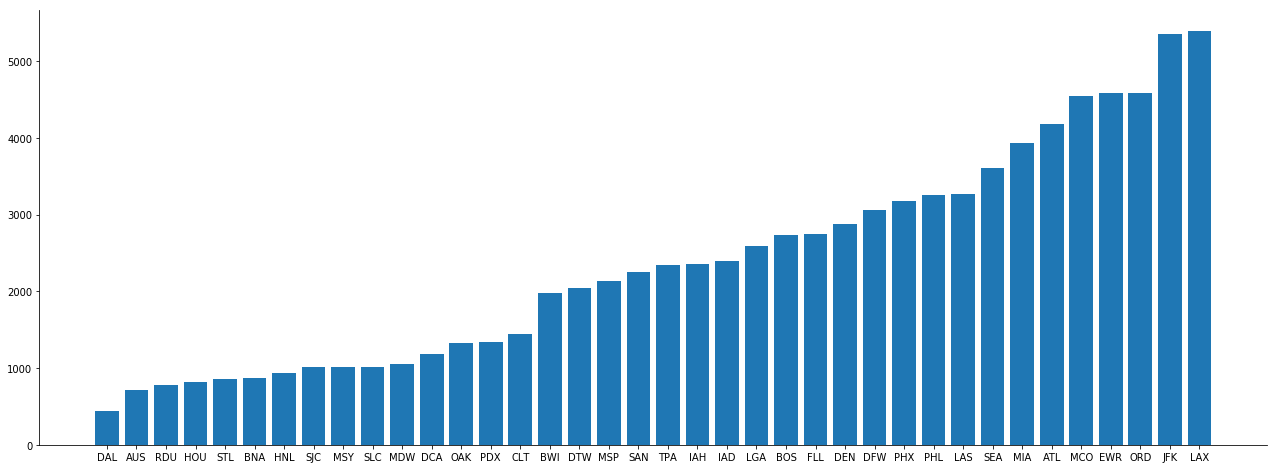

In [48]:
ser3 = df.groupby(['airport_code']).airport_code.count().sort_values()
fig, ax = plt.subplots(figsize=(22,8))
ax.bar(x=ser3.index, height=ser3.values);
sns.despine(ax=plt.gca())
fig.savefig(f'{saveplots}/airport_claim_count.png', Transparent=False)

# TIME BREAKOUT COLUMNS

In [276]:
df['Week/Year_inc_date'] = df['incident_date'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['Week_inc_date'] = df['incident_date'].apply(lambda x: "%d" % (x.week))
df['Month_inc_date'] = df['incident_date'].apply(lambda x: "%d" % (x.month))
df['Year_inc_date'] = df['incident_date'].apply(lambda x: "%d" % (x.year))

df['Week_received'] = df['date_received'].apply(lambda x: "%d" % (x.week))
df['Month_received'] = df['date_received'].apply(lambda x: "%d" % (x.month))
df['Year_received'] = df['date_received'].apply(lambda x: "%d" % (x.year))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a2761eac8>]],
      dtype=object)

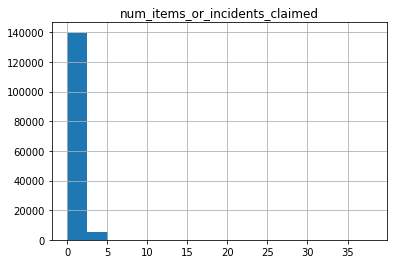

In [267]:
df.hist(column='num_items_or_incidents_claimed', bins=15)

In [35]:
sns.color_palette(palette='Blues')

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [38]:
plt.set_cmap(cmap='Blues')

<Figure size 432x288 with 0 Axes>

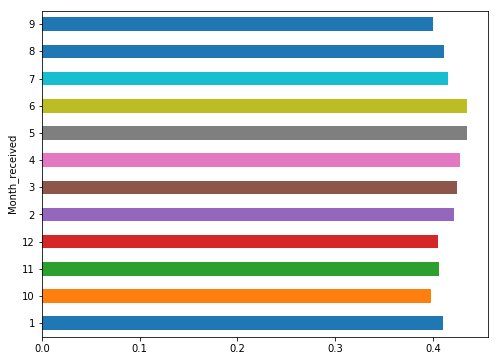

In [37]:
df.groupby('Month_received').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6), sort_columns=True)

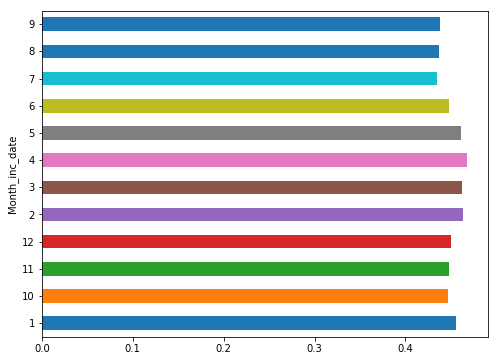

In [38]:
df.groupby('Month_inc_date').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6));

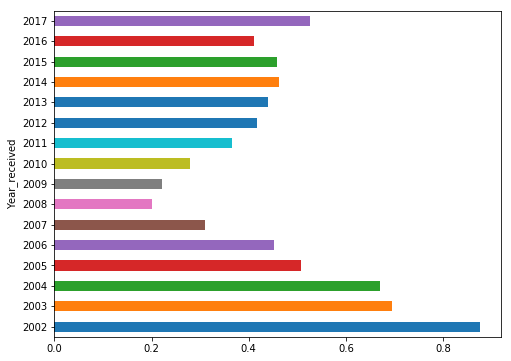

In [277]:
df.groupby('Year_received').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6));

In [93]:
# 
df[df.days_waited_to_file_claim < 180].hist(column='days_waited_to_file_claim',bins=180, figsize=(14,8))

AttributeError: 'NoneType' object has no attribute 'days_waited_to_file_claim'

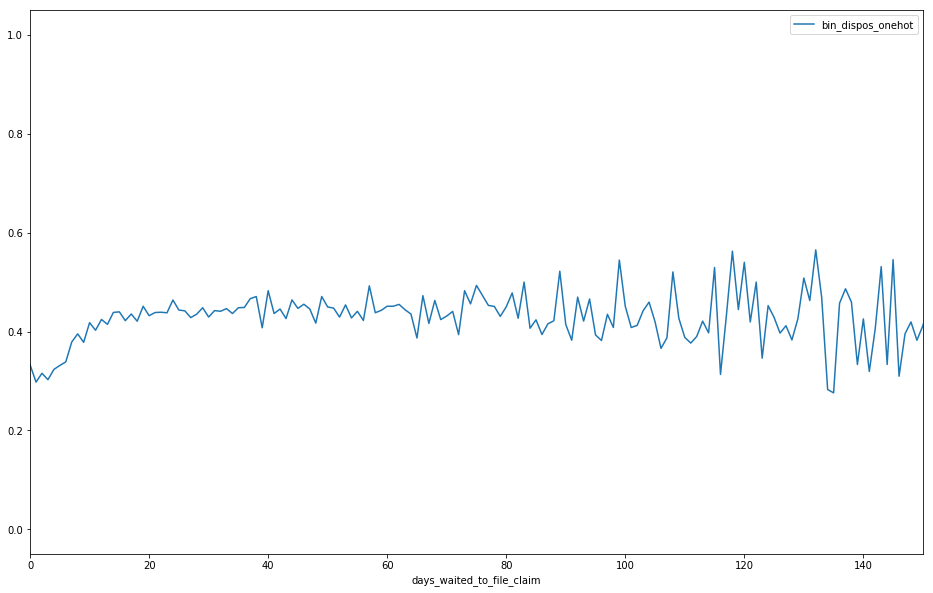

In [228]:
df.groupby('days_waited_to_file_claim').mean().plot(y='bin_dispos_onehot', xlim=(0,150),figsize=(16,10))

What are factors of play in driving results here?
What are most interesting ways to slice the data to see how the results may differ?
As a user of this model - what is the best ways I can use this information to make better decisions? (See above (file claim between 20-75). Can we get a tighter range on ideal filing time based on odds of fully/settled reimbursed?)

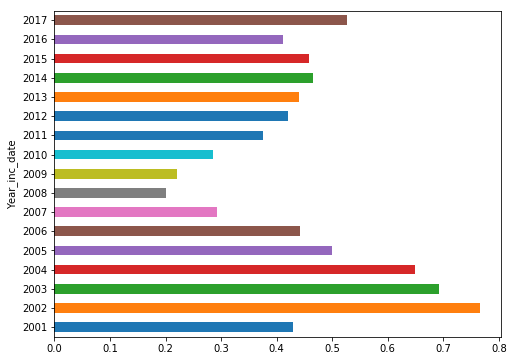

In [278]:
df.groupby('Year_inc_date').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6));

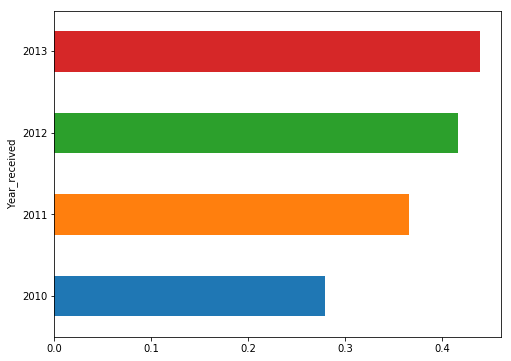

In [9]:
df.groupby('Year_received').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6))

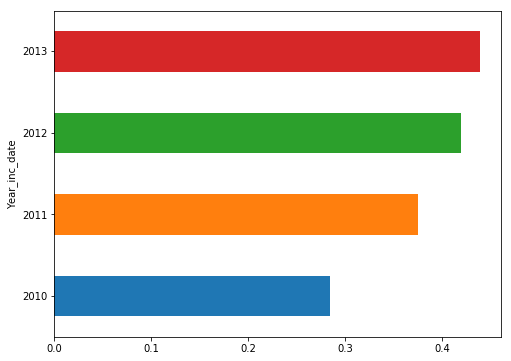

In [10]:
df.groupby('Year_inc_date').apply(lambda x: x.bin_dispos_onehot.sum() / x.bin_dispos_onehot.count()).plot(kind='barh', figsize=(8,6));